In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

import seaborn as sns

# 데이터 불러오기

In [9]:
df = pd.read_csv("BOSTON_HOUSING.csv", engine='python')
df

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [10]:
df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


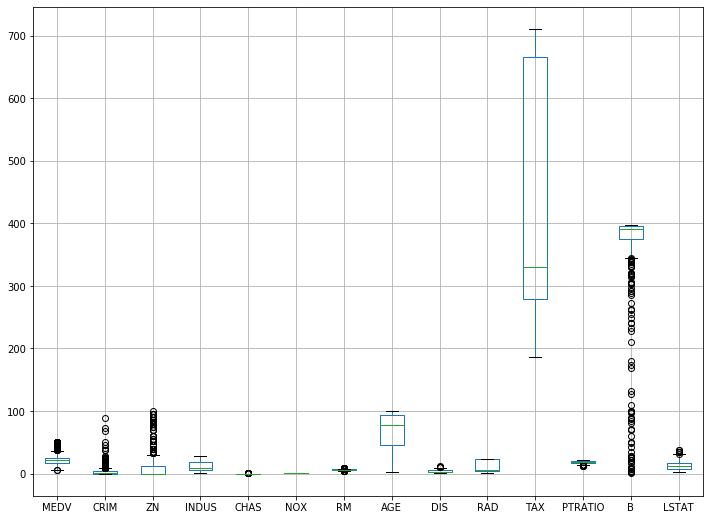

In [4]:
df.boxplot(figsize=(12,9))

우선 데이터에 대한 이상치를 확인하였다. 눈에 띄는 이상치가 보이지 않았고, 연속적인것으로 보였다.  
또한 집값이라는 것이 여러가지 요인이 합쳐져 만들어지는 것이기 때문에 데이터를 건드리면 다른 결과가 나올것 같아 이상치 처리를 따로 하지 않았다.

In [6]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

데이터의 결측치가 있는지 확인하니 없어서 그대로 진행하였다. 

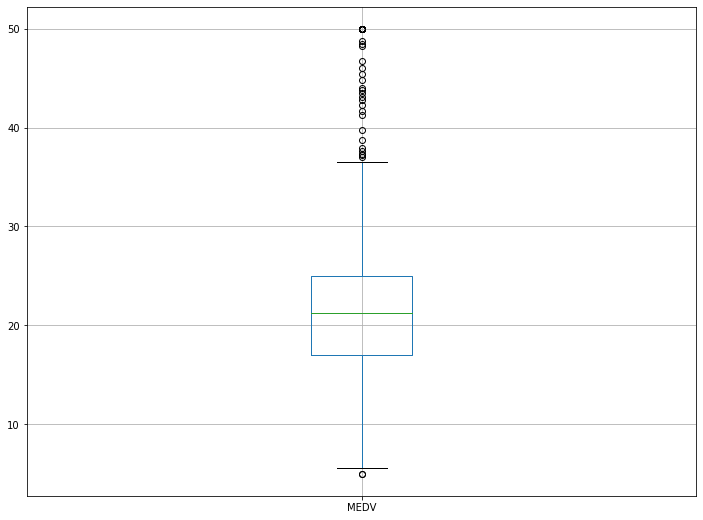

In [6]:
df_y = df[['MEDV']]
df_x = df.drop('MEDV', axis=1, inplace=False)
df_y.boxplot(figsize = (12,9))

집값을 boxplot으로 확인하여 40이상을 비싼 집에서 사는 사람으로 분류하였고, 10이하는 가격이 낮은 집이라고 판단하였다.

In [15]:
a = df[df['MEDV']>40].count()
a

MEDV       31
CRIM       31
ZN         31
INDUS      31
CHAS       31
NOX        31
RM         31
AGE        31
DIS        31
RAD        31
TAX        31
PTRATIO    31
B          31
LSTAT      31
dtype: int64

집값이 40 이상인 사람의 비율은 506명중에 31명으로 약 6%에 해당되는 수치이다.

In [17]:
b = df[df['MEDV']<10].count()
b

MEDV       24
CRIM       24
ZN         24
INDUS      24
CHAS       24
NOX        24
RM         24
AGE        24
DIS        24
RAD        24
TAX        24
PTRATIO    24
B          24
LSTAT      24
dtype: int64

집값이 10이하인 사람의 비율은 506명중에 24명으로 약 5%에 해당되는 수치이다. 

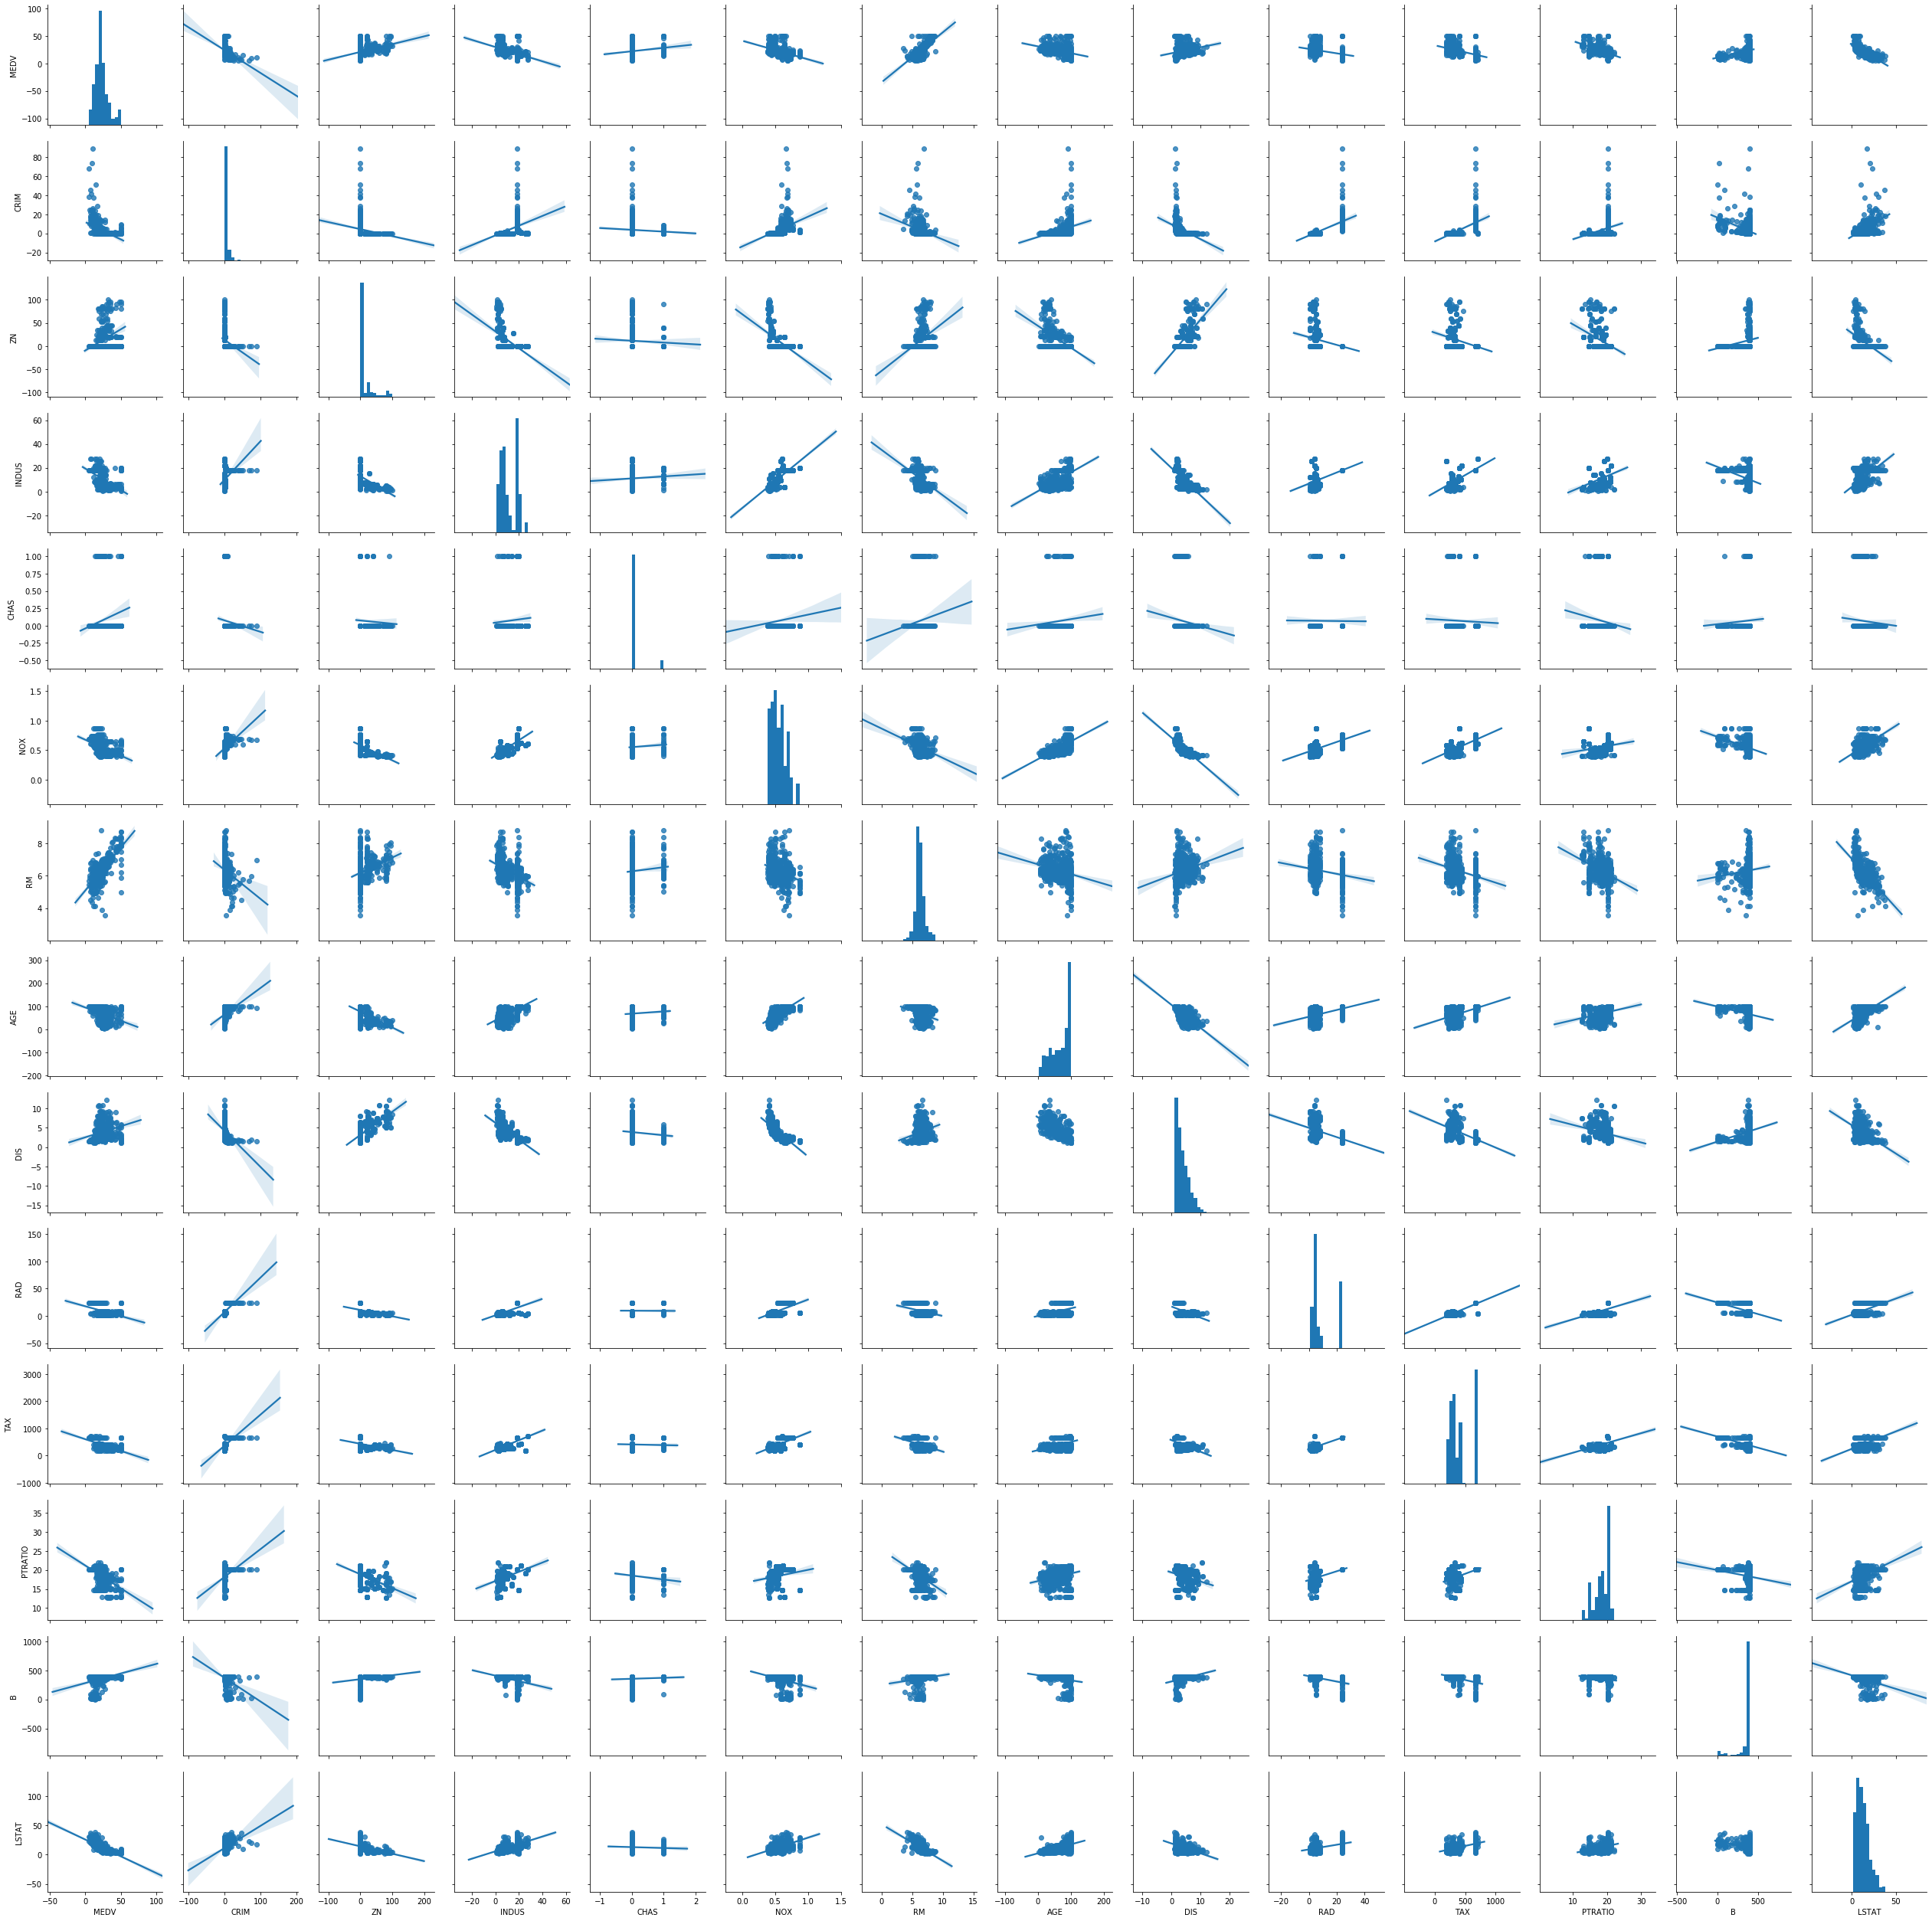

In [26]:
sns.pairplot(df, kind='reg')

In [29]:
df.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


# 범죄측면 상관관계 분석

범죄율이 오르면, 동시에 NOX(산화질소농도), RAD(고속도로접근편이성), TAX(재산세율), LSTAT(저소득층비율)이 증가함을 알 수 있다. 
상관관계가 0.5 이상을 기준으로 해석해보면, 범죄가 잘 일어나는 곳은 재산세율이 높고 고속도로 접근이 용이하다. 
저소득층이 많은 곳에서도 범죄가 많이 일어나는데 이는, 재산에 대한 범죄가 아닌, 폭력과 같은 범죄 부류로 예측된다. 

# ZN(주거지비율) 측면 상관관계 분석

주거지비율이 클수록 DIS(중심지거리)가 증가한다. 주거지 비율은 집끼리 붙어있는 것을 의미하므로, 집자체가 중심지 근처에서 형성되었음을 알 수있다.  
주거지비율이 적을수록 INDIUS(비소매업비율), NOX(산화질소농도), AGE(노후건물비율), LSTAT(저소득층비율)이 낮아진다.  
주거지를 형성하지 않는 곳에 비소매업 비율이 높고, 그에따른 환경조성도 관리가 되지 않는 것으로 보이며, 노후된 건물은 사람들이 모여서 살지않음을 알수있다.  
여기서 흥미로운것은 저소득층 비율 역시 낮아지는 것인데, 주거지를 형성하는 것은 소득과 관계없이 다른 요소에 의해 결정되는 것으로 보인다. 
    

# INDUS(비소매업비율) 측면 상관관계 분석

비소매업비율이 오르면, NOX(산화질소농도), AGE(노후건물), RAD(고속도로접근), TAX(재산세율), LSTAT(저소득층) 비율이 증가한다. 
비소매업의 경우, 공장같은것을 의미하므로, 고속도로 접근이 용이해야한다. 또한 저소득층비율 역시 많을 수 있다. 비소매업 근처에는 노후한 건물이 많으며, 산화질소농도가 높다.
반대로 DIS(중심지거리)는 감소한다. 

# CHAS(강조망권) 측면 상관관계 분석


강조망권을 분석해보니 유의미한 상관관계를 가지는 요소가 관찰되지 않았다. 

# NOX(산화질소농도) 측면 상관관계 분석

산화질소농도가 높으면, AGE(노후건물), RAD(고속도로접근), TAX(재산세율), LSTAT(저소득층) 비율이 증가한다.  


반대로 DIS(중심지거리)는 감소한다.

# AGE(노후건물) 측면 상관관계 분석

노후건물 비율이 증가하면 RAD(고속도로접근), TAX(재산세), LSTAT(저소득층비율)이 증가한다.  
반대로 DIS(중심지 거리)는 감소한다.   


# DIS(중심지거리) 측면 상관관계 분석

중심지거리가 증가하면 TAX(재산세율)이 증가한다.  
반면, RAD(고속도로접근), LSTAT(저소득층비율)이 감소한다. 

# RAD(고속도로접근) 측면 상관관계 분석

고속도로접근용이성이 증가하면 TAX, PTRARIO(학생당교사비율), LSTAT(저소득층비율)이 증가한다.  
반면, B(흑인인구비율)은 감소한다.

# TAX(재산세율) 측면 상관관계 분석


재산세율이 증가하면 PTRARIO(학생당 교사비율), LSTAT(저소득층비율)이 증가한다.  
반면 B(흑인인구비율)은 감소한다.

# 정리하면 ...

범죄가 잘 일어나는 곳은 재산세율이 높고 고속도로 접근이 용이하다.
주거지비율이 클수록 DIS(중심지거리)가 증가한다. 주거지 비율은 집끼리 붙어있는 것을 의미하므로, 집자체가 중심지 근처에서 형성되었음을 알 수있다.  
주거지비율이 적을수록 INDIUS(비소매업비율), NOX(산화질소농도), AGE(노후건물비율)이 낮아진다.  
주거지를 형성하지 않는 곳에 비소매업 비율이 높고, 그에따른 환경조성도 관리가 되지 않는 것으로 보이며, 노후된 건물은 사람들이 모여서 살지않음을 알수있다.  
비소매업비율이 오르면, NOX(산화질소농도), AGE(노후건물), RAD(고속도로접근), TAX(재산세율), LSTAT(저소득층) 비율이 증가한다. 
비소매업의 경우, 공장같은것을 의미하므로, 고속도로 접근이 용이해야한다. 또한 저소득층비율 역시 많을 수 있다. 비소매업 근처에는 노후한 건물이 많으며, 산화질소농도가 높다.
반대로 DIS(중심지거리)는 감소한다. 
산화질소농도가 높으면, AGE(노후건물), RAD(고속도로접근), TAX(재산세율), LSTAT(저소득층) 비율이 증가한다.  
반대로 DIS(중심지거리)는 감소한다.
노후건물 비율이 증가하면 TAX(재산세), LSTAT(저소득층비율)이 증가한다.  
반대로 DIS(중심지 거리)는 감소한다.   
중심지거리가 증가하면 TAX(재산세율)이 증가한다.  
고속도로접근용이성이 증가하면 TAX이 증가한다.  
재산세율이 증가하면 LSTAT(저소득층비율)이 증가한다.


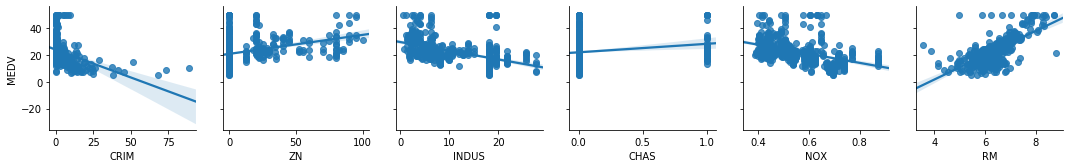

In [28]:
sns.pairplot(df, y_vars=['MEDV'], x_vars=df_x.columns[:6], kind='reg')

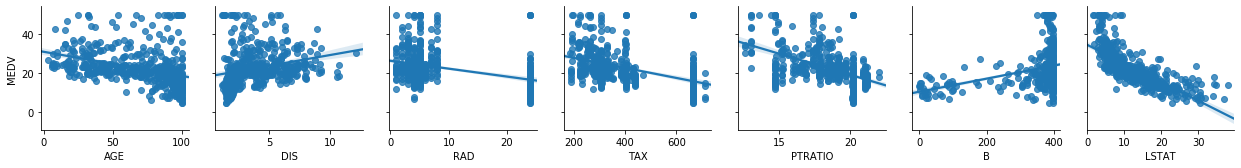

In [27]:
sns.pairplot(df, y_vars=['MEDV'], x_vars=df_x.columns[6:],kind='reg')

우선 집값과의 상관관계를 살펴보면 눈에 띄는 것이 몇가지 존재한다. RM(주거당평균객실수)와 양의상관관계, PSTRATIO(학생당교사비율)은 음의 상관관계,   
LSTAT(저소득층비율) 과도 음의 상관관계, CRIM(범죄율)과 음의 상관관계를 가지는 것을 알 수 있다. 

# 강주변분석

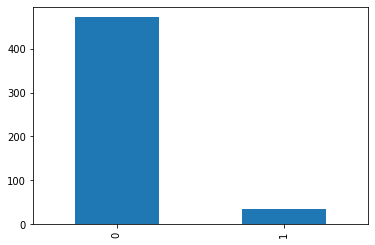

In [39]:
df_CHAS = df["CHAS"].value_counts()
df_CHAS.plot.bar()

바 그래프만 보아도 강조망권에 있는 집이 강조망권이 없는 집에 비해 상대적으로 낮은 것을 알 수 있다.  
우선 강조망권이 집값에 영향을 미치는지 확인하기 위해 가설을 설정하였다. 

귀무가설 : 강조망권의 유무는 집값에 영향을 미치지 않는다.   
대립가설 : 강조망권의 유무는 집값에 영향을 미친다. 

In [43]:
chas_1 = df[df["CHAS"]==1]
chas_0 = df[df["CHAS"]==0]

In [45]:
print(shapiro(chas_1['MEDV']))
print(shapiro(chas_0['MEDV']))

(0.8359232544898987, 0.00011230883683310822)
(0.9282605051994324, 3.113930960958397e-14)


예상했던대로 강조망권의 경우 강조망권이 있는 경우는 데이터수가 적어 정규성을 갖지 않았고,  
강조망권이 없는 경우는 데이터수가 많아 정규성을 만족하는 것을 알 수 있다. 

In [47]:
stats.levene(chas_1["MEDV"], chas_0["MEDV"])

LeveneResult(statistic=4.590342071304883, pvalue=0.03263097878646009)

등분산성 검사 결과 p값이 0.05보다 작으므로 등분산성을 만족함울 알 수있다. 

In [50]:
t_result = stats.ttest_ind(chas_1['MEDV'], chas_0['MEDV'], equal_var= True)
t_result

Ttest_indResult(statistic=3.9964374793264246, pvalue=7.390622770250372e-05)

In [52]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-sample t-test")
print("T :", t)
print("p :", p)

2-sample t-test
T : 3.996
p : 0.0


p값이 0이므로 귀무가설을 기각하고, 대립가설을 채택한다. 따라서 강주변의 요소는 집값에 영향을 미침을 알 수 있다. 

# 도심위치는 집값이 비싼가?

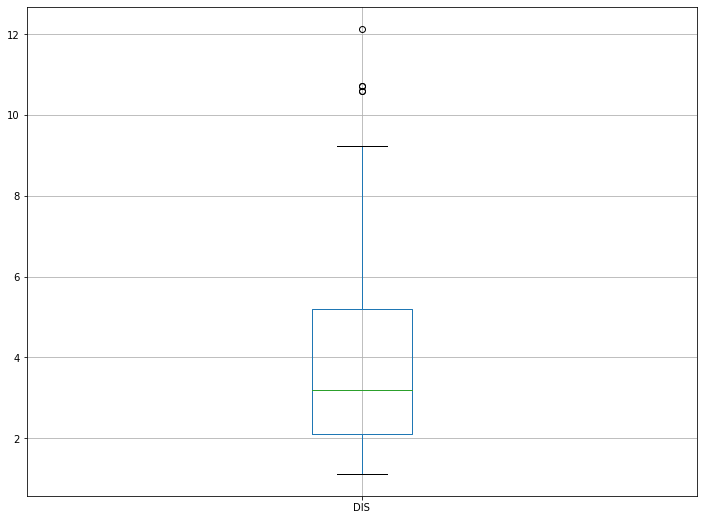

In [53]:
df_DIS = df[['DIS']]
df_DIS.boxplot(figsize = (12,9))

우선 중심지의 거리를 반으로 나누었다. 6이상은 멀다고 판단하였고, 미만은 가깝다고 판단하였다. 


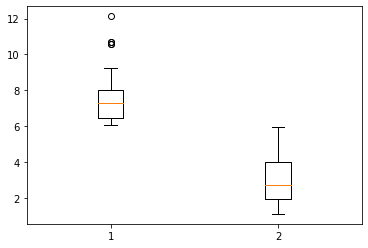

In [55]:
d1 = df[df['DIS']>6]
d2 = df[df['DIS']<6]

box_data = [d1['DIS'], d2['DIS']]
temp = plt.boxplot(box_data)
plt.show()

In [56]:
t_result = stats.ttest_ind(d1['MEDV'], d2['MEDV'], equal_var= True)
t_result

Ttest_indResult(statistic=2.612156515800825, pvalue=0.009265751636541862)

In [57]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-sample t-test")
print("T :", t)
print("p :", p)

2-sample t-test
T : 2.612
p : 0.009


중심지거리가 집값에 영향을 미치는지 확인하기 위해 가설을 설정하였다. 

귀무가설 : 중심지 거리는 집값에 영향을 미치지 않는다.   
대립가설 : 중심지 거리는 집값에 영향을 미친다. 

p값이 0.009이므로 귀무가설을 기각하고, 대립가설을 채택한다. 따라서 중심지 거리는 집값에 영향을 미침을 알 수 있다. 

# 오래된 주택?

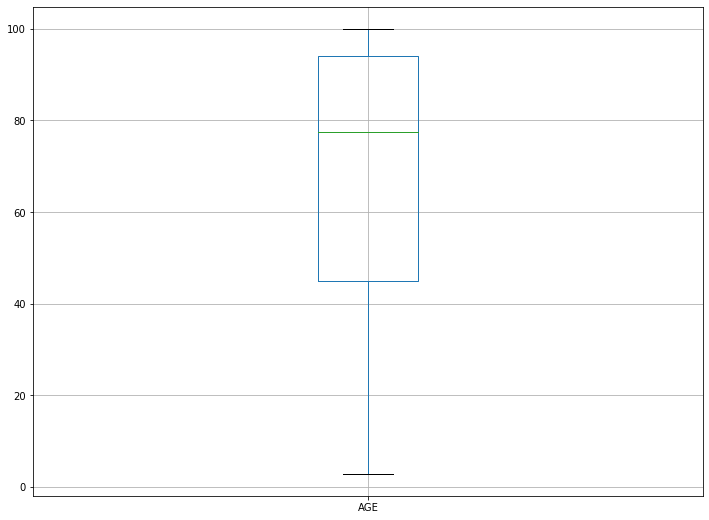

In [58]:
df_AGE = df[['AGE']]
df_AGE.boxplot(figsize = (12,9))

노후정도는 60이상과 60이하로 나누었다. 

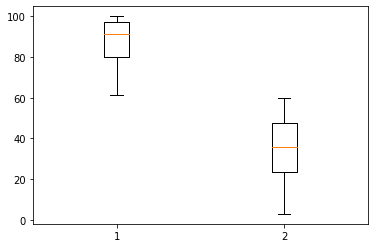

In [60]:
da1 = df[df['AGE']>60]
d2 = df[df['AGE']<60]

box_data = [d1['AGE'], d2['AGE']]
temp = plt.boxplot(box_data)
plt.show()

In [61]:
t_result = stats.ttest_ind(d1['MEDV'], d2['MEDV'], equal_var= True)
t_result

Ttest_indResult(statistic=-7.384716975537154, pvalue=6.36917658145168e-13)

In [62]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-sample t-test")
print("T :", t)
print("p :", p)

2-sample t-test
T : -7.385
p : 0.0


노후된주택이 집값에 영향을 미치는지 확인하기 위해 가설을 설정하였다. 

귀무가설 : 오래된 주택은 집값에 영향을 미치지 않는다.   
대립가설 : 오래된 주택은 집값에 영향을 미친다. 

p값이 0이므로 귀무가설을 기각하고, 대립가설을 채택한다. 따라서 오래된주택은 집값에 영향을 미침을 알 수 있다. 

# 산화질소농도?

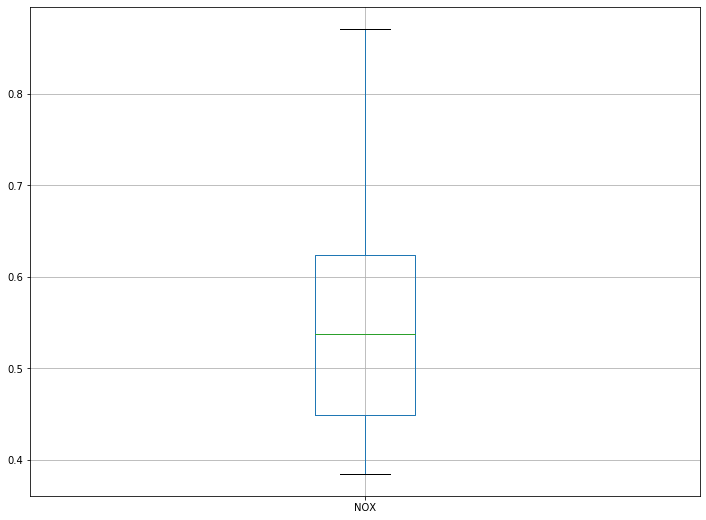

In [66]:
df_NOX = df[['NOX']]
df_NOX.boxplot(figsize = (12,9))

산화농도는 0.55를 기준으로 나누었다.

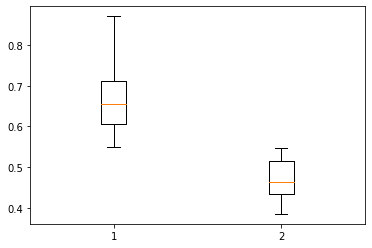

In [68]:
d1 = df[df['NOX']>0.55]
d2 = df[df['NOX']<0.55]

box_data = [d1['NOX'], d2['NOX']]
temp = plt.boxplot(box_data)
plt.show()

In [69]:
t_result = stats.ttest_ind(d1['MEDV'], d2['MEDV'], equal_var= True)
t_result

Ttest_indResult(statistic=-7.934660122662648, pvalue=1.3760955849194375e-14)

In [70]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-sample t-test")
print("T :", t)
print("p :", p)

2-sample t-test
T : -7.935
p : 0.0


산화질소농도가 집값에 영향을 미치는지 확인하기 위해 가설을 설정하였다. 

귀무가설 : 산화질소농도는 집값에 영향을 미치지 않는다.   
대립가설 : 산화질소농도는 집값에 영향을 미친다. 

p값이 0이므로 귀무가설을 기각하고, 대립가설을 채택한다. 따라서 산화질소농도는 집값에 영향을 미침을 알 수 있다. 

# 어떤요소가 집값에 영향?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


%matplotlib inline

# 회귀모델생성

In [29]:
model1 =smf.ols(formula='MEDV~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data = df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        23:11:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

# 회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [17]:
df_x = df.drop("MEDV", axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,CHAS,1.074
12,B,1.349
1,CRIM,1.792
11,PTRATIO,1.799
6,RM,1.934
2,ZN,2.299
13,LSTAT,2.941
7,AGE,3.101
8,DIS,3.956
3,INDUS,3.992


다중공선성을 확인하니 서로 영향을 주는것이 없다.

# step 4 후진제거법을 이용한 변수 선택

In [18]:
df_y = df['MEDV']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_x, df_y)
rfe.support_
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variable : ", selected_cols)
print("Removed Variable : ", removed_cols)




Selected Variable :  Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')
Removed Variable :  Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'], dtype='object')


## 후진제거법을 이용한 변수 선택 및 모델 생성

In [19]:
rfe_model = smf.ols(formula='MEDV~ CHAS + NOX + RM + DIS + PTRATIO', data = df)
rfe_result = rfe_model.fit()
print(rfe_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          1.46e-106
Time:                        21:35:56   Log-Likelihood:                -1586.2
No. Observations:                 506   AIC:                             3184.
Df Residuals:                     500   BIC:                             3210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0499      5.026      4.785      0.0

In [20]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_vif_rfe = pd.DataFrame()
df_vif_rfe['variable'] = df_x_rfe_const.columns
df_vif_rfe["VIF"] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_vif_rfe.sort_values('VIF', inplace=True)
df_vif_rfe.round(3)

/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,CHAS,1.040
5,PTRATIO,1.202
3,RM,1.244
4,DIS,2.529
2,NOX,2.603
0,const,408.371


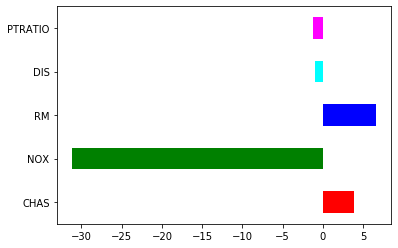

In [21]:
ref_coef = pd.DataFrame({"Coef" :rfe_result.params.values[1:]}, index= selected_cols)
ref_coef.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])

In [22]:
scaler = StandardScaler()
cols = df_x.columns
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)
df.reset_index(inplace=True)
df_scaled['MEDV'] = df['MEDV']
reg_model_scaled = smf.ols(formula='MEDV~ CHAS + NOX + RM + DIS + PTRATIO', data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sat, 08 Feb 2020   Prob (F-statistic):          1.46e-106
Time:                        21:35:58   Log-Likelihood:                -1586.2
No. Observations:                 506   AIC:                             3184.
Df Residuals:                     500   BIC:                             3210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.249     90.597      0.0

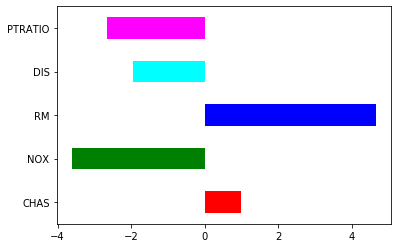

In [23]:
ref_coef2 = pd.DataFrame({"Coef" :reg_result_scaled.params.values[1:]}, index= selected_cols)
ref_coef2.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])

표준화까지 마치니 RM, NOX, PTRATIO, DIS, CHAS 순으로 영향력이 큰 것을 알 수 있었다. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



# 의사결정나무

In [19]:
df = pd.read_csv("BOSTON_HOUSING.csv", engine='python')
df

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [20]:
df_y = df['MEDV']
df_x = df.drop('MEDV', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (202, 13)
train data Y size :  (202,)
valid data X size :  (152, 13)
valid data Y size :  (152,)
test data X size :  (152, 13)
test data Y size :  (152, 13)


# 모델 parameter 조정

In [21]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidScore"] = valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,1,1.000,0.659
1,2,0.987,0.641
2,3,0.940,0.683
3,4,0.902,0.720
4,5,0.872,0.711
5,6,0.854,0.729
6,7,0.862,0.757
7,8,0.869,0.737
8,9,0.828,0.743
9,10,0.800,0.724


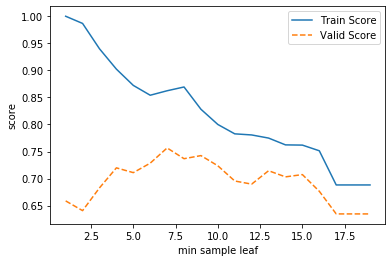

In [22]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()

In [23]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(1,31)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = valid_score
df_score_split.round(3)



,MinSamplesSplit,TrainScore,TestScore
0,2,0.828,0.743
1,4,0.828,0.743
2,6,0.828,0.743
3,8,0.828,0.743
4,10,0.828,0.743
5,12,0.828,0.743
6,14,0.828,0.743
7,16,0.828,0.743
8,18,0.828,0.743
9,20,0.828,0.743


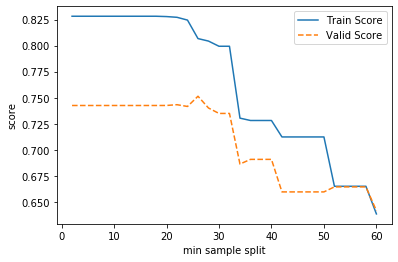

In [24]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()



In [25]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,15)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=26, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)



,Depth,TrainScore,ValidScore
0,1,0.448,0.386
1,2,0.651,0.655
2,3,0.724,0.715
3,4,0.782,0.721
4,5,0.799,0.751
5,6,0.807,0.751
6,7,0.807,0.751
7,8,0.807,0.751
8,9,0.807,0.751
9,10,0.807,0.751


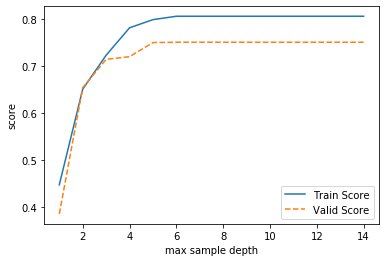

In [26]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label= "Valid Score")
plt.ylabel("score")
plt.xlabel("max sample depth")
plt.legend()

In [27]:
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=26, max_depth=5)
tree_final.fit(df_train_x, df_train_y)
print("score on training set : ", tree_final.score(df_train_x,df_train_y))
print("score on valid set : ", tree_final.score(df_valid_x,df_valid_y))



score on training set :  0.799478790659639
score on valid set :  0.7506520258419805


In [29]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.812
5,RM,0.096
7,DIS,0.060
0,CRIM,0.030
4,NOX,0.002
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000
6,AGE,0.000
8,RAD,0.000


Text(0, 0.5, '변수')

/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-package

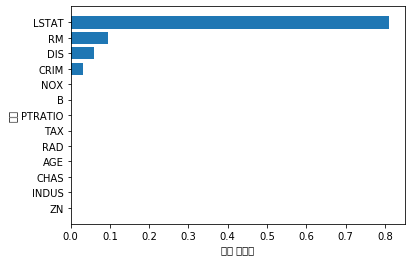

In [30]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [31]:
pred = tree_final.predict(df_test_x)
error = df_test_y - pred
mse = np.mean(error * error)
mae = np.mean(abs(error))
print("MSE : " , mse)
print("MAE : ", mae)

MSE :  17.44091415022408
MAE :  3.0226688234301555


In [32]:
print("score on training set : ", tree_final.score(df_train_x,df_train_y))
print("score on test set : ", tree_final.score(df_test_x,df_test_y))

score on training set :  0.799478790659639
score on test set :  0.7709284630941435


중요도는 LSTAT, RM, DIS, CRIM 순이다. 

# 랜덤포레스트

In [37]:
df_y = df['MEDV']
df_x = df.drop('MEDV', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (202, 13)
train data Y size :  (202,)
valid data X size :  (152, 13)
valid data Y size :  (152,)
test data X size :  (152, 13)
test data Y size :  (152, 13)


# 모델 parameter 조정(n_estimator)

In [38]:
train_score = []
valid_score = []
para_n_tree = [n_tree * 5 for n_tree in range(1,30)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValidScore"] = valid_score

df_score_n.round(3)

,n_estimators,TrainScore,ValidScore
0,5,0.957,0.765
1,10,0.970,0.803
2,15,0.973,0.812
3,20,0.975,0.814
4,25,0.977,0.809
5,30,0.978,0.810
6,35,0.980,0.811
7,40,0.978,0.811
8,45,0.979,0.815
9,50,0.979,0.815


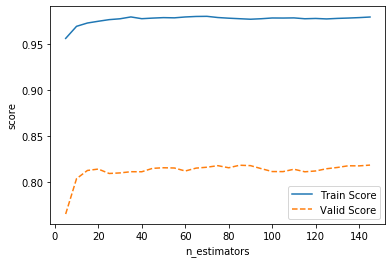

In [39]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()



In [40]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=145, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidScore"] = valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,1,0.980,0.818
1,2,0.963,0.820
2,3,0.940,0.822
3,4,0.915,0.822
4,5,0.891,0.824
5,6,0.872,0.822
6,7,0.850,0.817
7,8,0.830,0.806
8,9,0.810,0.795
9,10,0.794,0.787


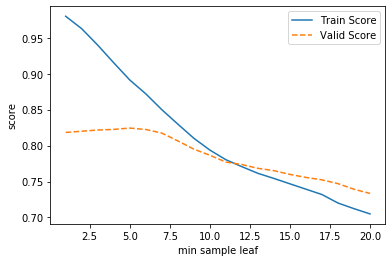

In [41]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()



In [45]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(2,21)]
for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=145, min_samples_leaf=5, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidScore"] = valid_score
df_score_split.round(3)



,MinSamplesSplit,TrainScore,ValidScore
0,4,0.891,0.824
1,6,0.891,0.824
2,8,0.891,0.824
3,10,0.891,0.824
4,12,0.887,0.823
5,14,0.882,0.822
6,16,0.874,0.820
7,18,0.866,0.815
8,20,0.857,0.809
9,22,0.844,0.798


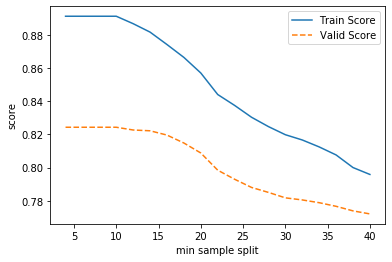

In [46]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()

In [47]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,20)]
for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=145, min_samples_leaf=5,
                               min_samples_split=10, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)



,Depth,TrainScore,ValidScore
0,1,0.595,0.601
1,2,0.776,0.773
2,3,0.844,0.804
3,4,0.871,0.818
4,5,0.884,0.823
5,6,0.889,0.824
6,7,0.890,0.824
7,8,0.891,0.824
8,9,0.891,0.824
9,10,0.891,0.824


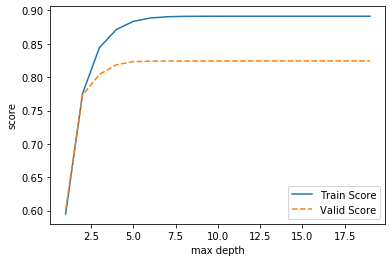

In [48]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

In [49]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=145, min_samples_leaf=5,
                               min_samples_split=10, max_depth=8)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : ", rf_final.score(df_train_x,df_train_y))
print("score on valid set : ", rf_final.score(df_valid_x,df_valid_y))




score on training set :  0.8910795168898562
score on valid set :  0.8241969764439128


In [50]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.520
5,RM,0.363
4,NOX,0.028
7,DIS,0.021
0,CRIM,0.019
6,AGE,0.017
9,TAX,0.008
10,PTRATIO,0.007
11,B,0.006
8,RAD,0.006


Text(0, 0.5, '변수')

/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-package

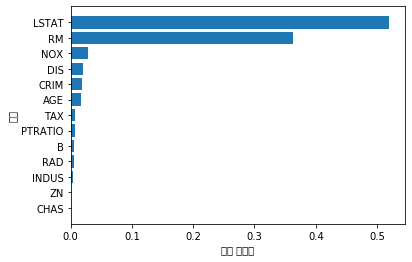

In [51]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

중요도는 LSTAT, RM, NOX, DIS, CRIM, AGE, TAX, 순으로 영향을 미친다. 

In [52]:
pred = rf_final.predict(df_test_x)
error = df_test_y - pred
mse = np.mean(error * error)
mae = np.mean(abs(error))
print("MSE : " , mse)
print("MAE : ", mae)

MSE :  9.210911772360438
MAE :  2.208957361512842


In [54]:
print("score on training set : ", rf_final.score(df_train_x,df_train_y))
print("score on test set : ", rf_final.score(df_test_x,df_test_y))


score on training set :  0.8910795168898562
score on test set :  0.8790225272697793


# 그래디언트 부스트

In [57]:
df_y = df['MEDV']
df_x = df.drop('MEDV', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (202, 13)
train data Y size :  (202,)
valid data X size :  (152, 13)
valid data Y size :  (152,)
test data X size :  (152, 13)
test data Y size :  (152, 13)


# 모델 parameter 조정(n_estimator)


In [58]:
train_score = []
valid_score = []
para_n_tree = [n_tree * 5 for n_tree in range(1,50)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = valid_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,5,0.563,0.506
1,10,0.786,0.697
2,15,0.878,0.761
3,20,0.922,0.787
4,25,0.943,0.795
5,30,0.956,0.794
6,35,0.965,0.792
7,40,0.971,0.794
8,45,0.975,0.795
9,50,0.978,0.796


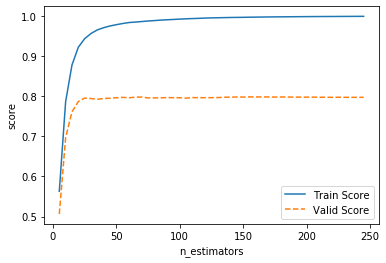

In [59]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [60]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=70, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.986,0.798
1,2,0.987,0.799
2,3,0.984,0.795
3,4,0.980,0.791
4,5,0.979,0.797
5,6,0.972,0.801
6,7,0.969,0.806
7,8,0.966,0.810
8,9,0.962,0.802
9,10,0.954,0.818


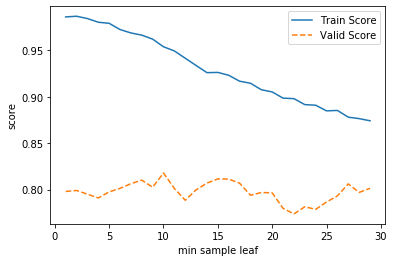

In [61]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()




In [64]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(1,31)]
for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=70, min_samples_leaf=10, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidScore"] = valid_score
df_score_split.round(3)



,MinSamplesSplit,TrainScore,ValidScore
0,2,0.954,0.818
1,4,0.954,0.818
2,6,0.954,0.818
3,8,0.954,0.818
4,10,0.954,0.818
5,12,0.954,0.818
6,14,0.954,0.818
7,16,0.954,0.818
8,18,0.954,0.818
9,20,0.954,0.818


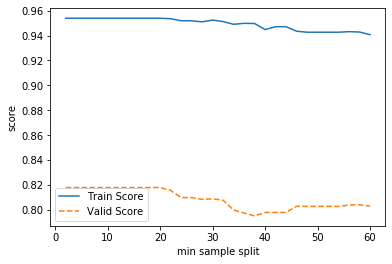

In [65]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()

In [66]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,30)]
for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=70, min_samples_leaf=10, min_samples_split=20, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
 
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)




,Depth,TrainScore,ValidScore
0,1,0.837,0.786
1,2,0.923,0.828
2,3,0.954,0.818
3,4,0.970,0.789
4,5,0.980,0.795
5,6,0.984,0.802
6,7,0.986,0.797
7,8,0.986,0.794
8,9,0.987,0.790
9,10,0.987,0.795


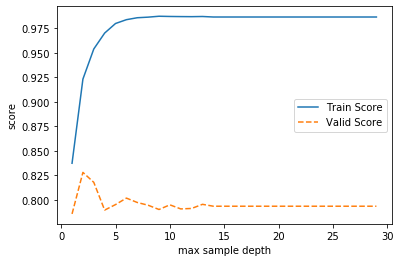

In [67]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label= "Valid Score")
plt.ylabel("score")
plt.xlabel("max sample depth")
plt.legend()

In [69]:
train_score = []
valid_score = []
para_lr = [lr * 0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=70, min_samples_leaf=10, min_samples_split=20
                               , max_depth=3, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))

    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = valid_score
df_score_lr.round(3)




,LearningRate,TrainScore,TestScore
0,0.1,0.954,0.818
1,0.2,0.981,0.800
2,0.3,0.990,0.783
3,0.4,0.995,0.787
4,0.5,0.995,0.757
5,0.6,0.998,0.722
6,0.7,0.998,0.755
7,0.8,0.999,0.709
8,0.9,0.999,0.663


In [71]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=70, min_samples_leaf=10, min_samples_split=20
                               , max_depth=3,learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)
print("score on training set : ", gb_final.score(df_train_x,df_train_y))
print("score on valid set : ", gb_final.score(df_valid_x,df_valid_y))




score on training set :  0.9539490721526984
score on valid set :  0.8177752659371854


In [72]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.541
5,RM,0.263
7,DIS,0.049
4,NOX,0.038
6,AGE,0.038
0,CRIM,0.022
10,PTRATIO,0.015
2,INDUS,0.012
9,TAX,0.007
11,B,0.006


Text(0, 0.5, '변수')

/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-package

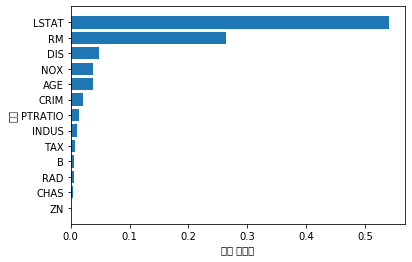

In [73]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

변수중요도는 LSTAT, RM, DIS, NOX, AGE, CRIM 순으로 영향이 있다. 

In [74]:
pred = gb_final.predict(df_test_x)
error = df_test_y - pred
mse = np.mean(error * error)
mae = np.mean(abs(error))
print("MSE : " , mse)
print("MAE : ", mae)

MSE :  7.897375724795469
MAE :  2.1343677090661393


In [75]:
print("score on training set : ", gb_final.score(df_train_x,df_train_y))
print("score on test set : ", gb_final.score(df_test_x,df_test_y))

score on training set :  0.9539490721526984
score on test set :  0.8962747033085615


In [12]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.tree import DecisionTreeRegressor

df_y = df['MEDV']
df_x = df.drop('MEDV', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)



train data X size :  (354, 13)
train data Y size :  (354,)
test data X size :  (152, 13)
test data Y size :  (152, 13)


In [13]:
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=26, max_depth=5)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state=1234, n_estimators=145, min_samples_leaf=5, min_samples_split=10
                               , max_depth=8)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=70, min_samples_leaf=10,
                                    min_samples_split=20, max_depth=3, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
models = ['linearregression', 'decisiontree', 'randomforest', 'gradientboosting']
mse, rmse, mae, mape = [],[],[],[]

#회귀분석
lr_y_pred = result1.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_err

In [ ]:
models = ['linearregression', 'decisiontree', 'randomforest', 'gradientboosting']
mse, rmse, mae, mape = [],[],[],[]

#회귀분석
lr_y_pred = result1.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_err

In [30]:
models = ['linearregression', 'decisiontree', 'randomforest', 'gradientboosting']
mse, rmse, mae, mape = [],[],[],[]

#회귀분석
lr_y_pred = result1.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))





In [31]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))



In [32]:
#랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))



In [33]:
#그래디언트부스팅
gb_y_pred = gb_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))




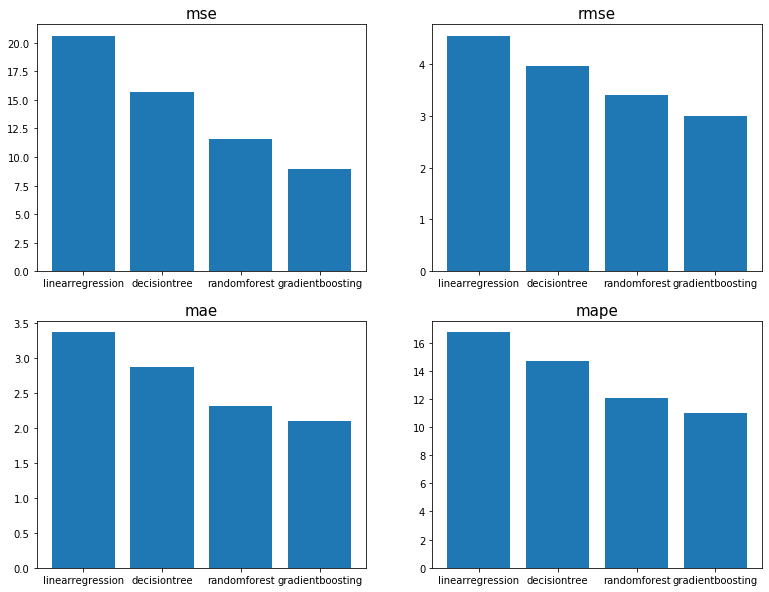

In [34]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

In [ ]:
linearregression은 mse가 굉장히 높게 나왔으며, gradientboosting이 가장 작게 나왔으므로 gradientboosting 모델을 선택하였다.